# Data Importing and Pre-processing

In [2]:
#import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#read in file
housing_df = pd.read_csv('house_sales.csv')

FileNotFoundError: ignored

In [ ]:
#check number of rows and columns
housing_df.shape

(21613, 21)

In [ ]:
#count the number of categorical variables and countinuous variables
cat_count = 0
for dtype in housing_df.dtypes:
    if dtype == 'object':
        cat_count = cat_count + 1
cont_count = housing_df.shape[1] - cat_count - 1
print(f"Number of Categorical Variables: {cat_count}")
print(f"Number of Continuous Variables: {cont_count}")

Number of Categorical Variables: 1
Number of Continuous Variables: 19


In [ ]:
#print first 5 rows
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#check the column names
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Handling missing data


In [ ]:
#missing data
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bedrooms,1134,0.052468
sqft_living,1110,0.051358
bathrooms,1068,0.049415
sqft_lot,1044,0.048304
id,0,0.000000
sqft_basement,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000


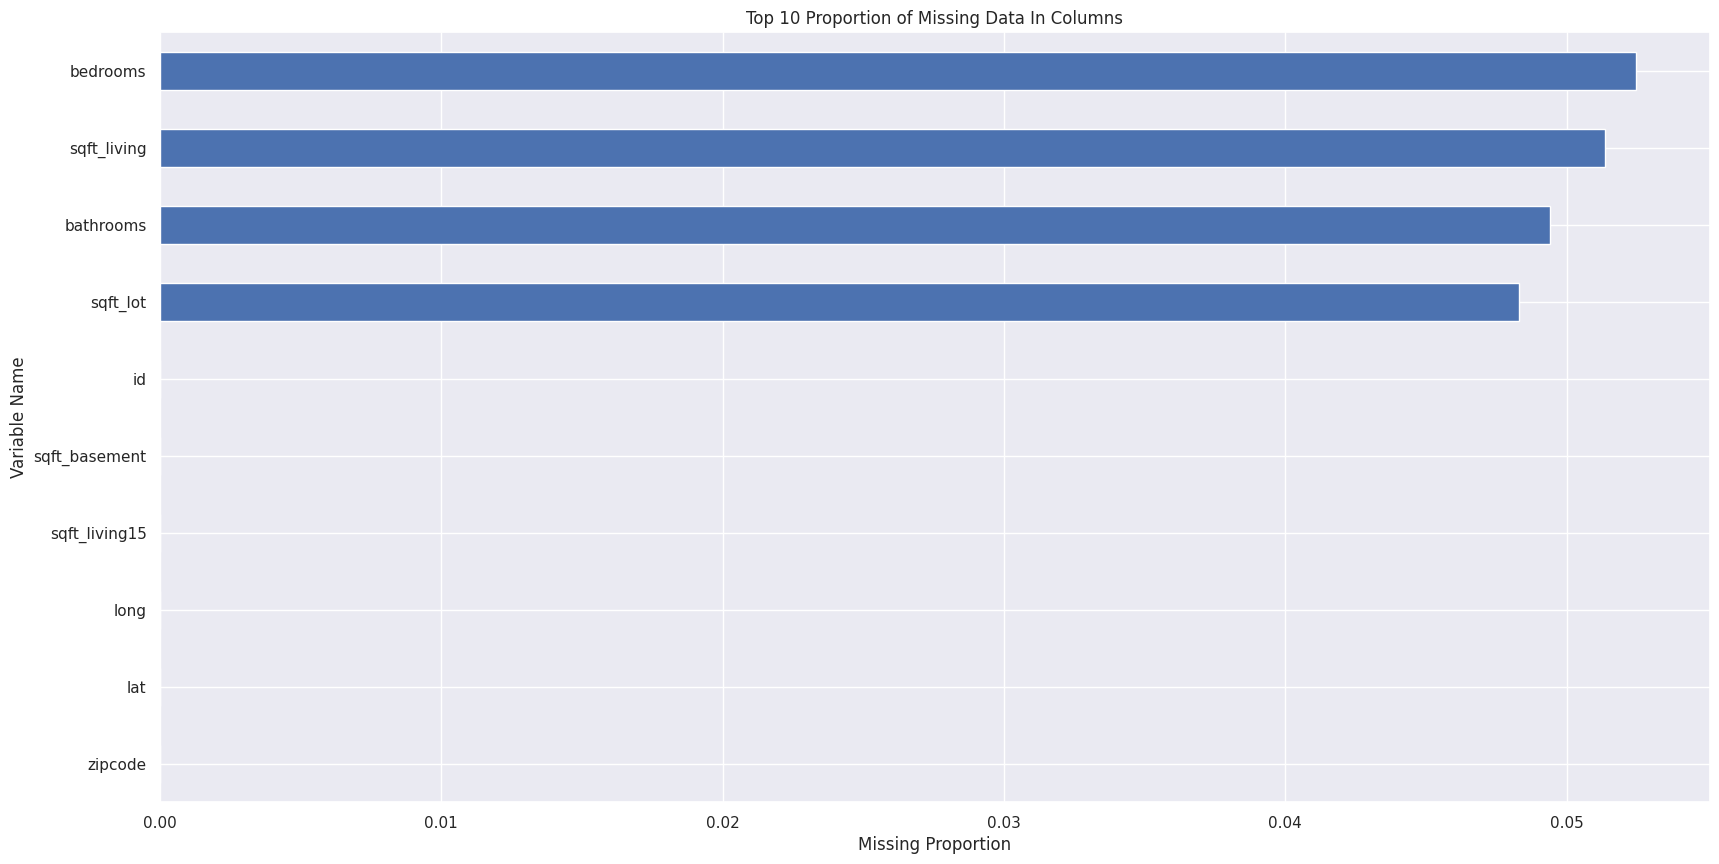

In [ ]:
missing_data['Percent'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [ ]:
housing_df["bedrooms"] = housing_df.groupby("zipcode")["bedrooms"].transform(lambda x: x.fillna(x.median()))
housing_df["sqft_living"] = housing_df.groupby("zipcode")["sqft_living"].transform(lambda x: x.fillna(x.median()))
housing_df["bathrooms"] = housing_df.groupby("zipcode")["bathrooms"].transform(lambda x: x.fillna(x.median()))
housing_df["sqft_lot"] = housing_df.groupby("zipcode")["sqft_lot"].transform(lambda x: x.fillna(x.median()))

In [ ]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Check remaining missing values if any
all_data_na = (housing_df.isnull().sum() / len(housing_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
housing_df['bedrooms'].value_counts()

3.0     10156
4.0      6783
2.0      2617
5.0      1539
6.0       263
1.0       189
7.0        34
8.0        12
0.0        11
9.0         5
10.0        3
33.0        1
Name: bedrooms, dtype: int64

## Handling Outliers

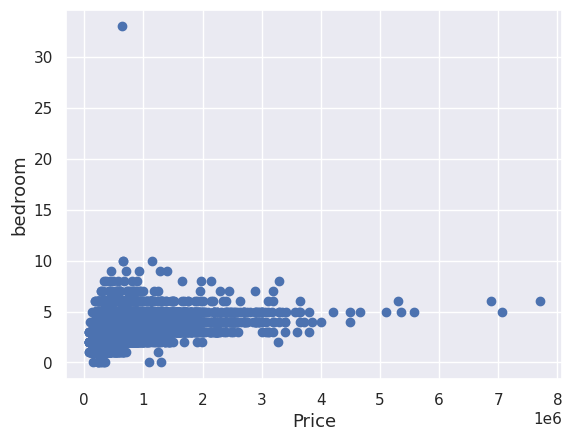

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = housing_df['price'], y = housing_df['bedrooms'])
plt.ylabel('bedroom', fontsize=13)
plt.xlabel('Price', fontsize=13)
plt.show()

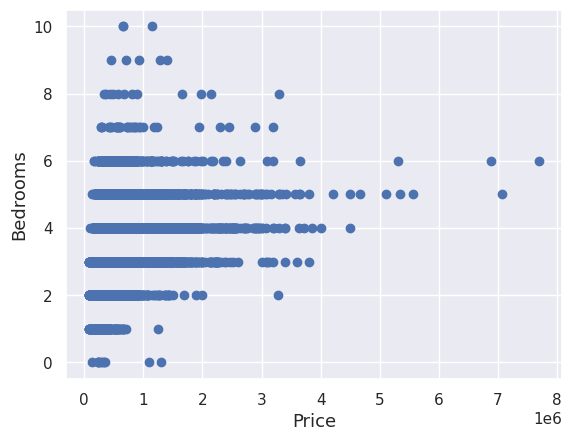

In [ ]:
# cut the outlier
#Deleting outliers
housing_df_new = housing_df.copy()
housing_df_new = housing_df_new.drop(housing_df_new[(housing_df_new['bedrooms']>15)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(housing_df_new['price'], housing_df_new['bedrooms'])
plt.ylabel('Bedrooms', fontsize=13)
plt.xlabel('Price', fontsize=13)
plt.show()

## Normalize Target Variable


 mu = 540088.14 and sigma = 367118.70



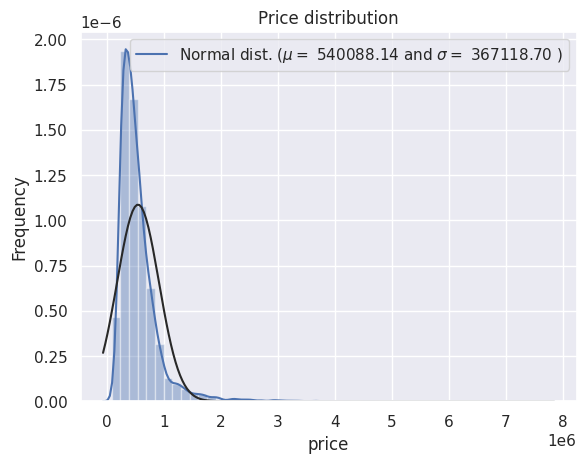

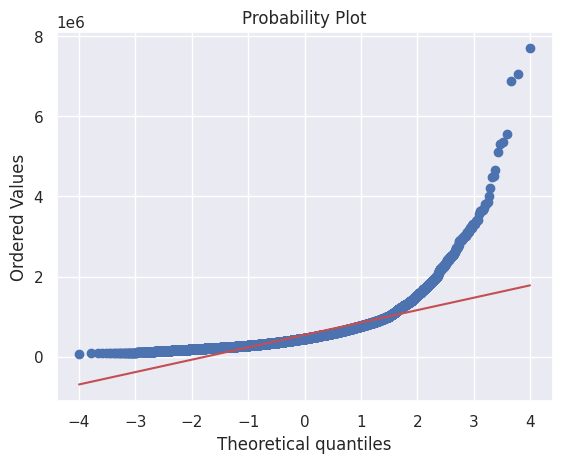

In [ ]:
sns.distplot(housing_df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(housing_df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(housing_df['price'], plot=plt)
plt.show()


 mu = 13.05 and sigma = 0.53



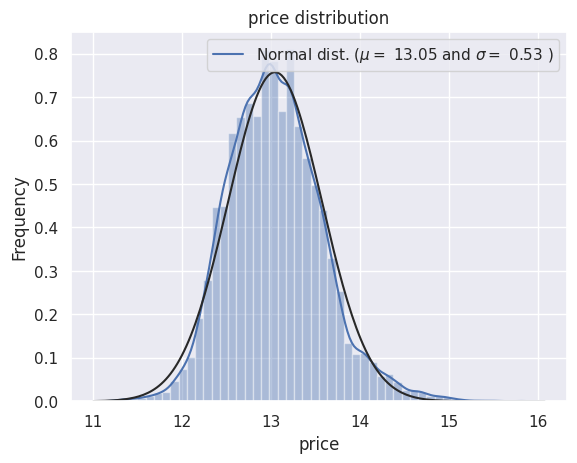

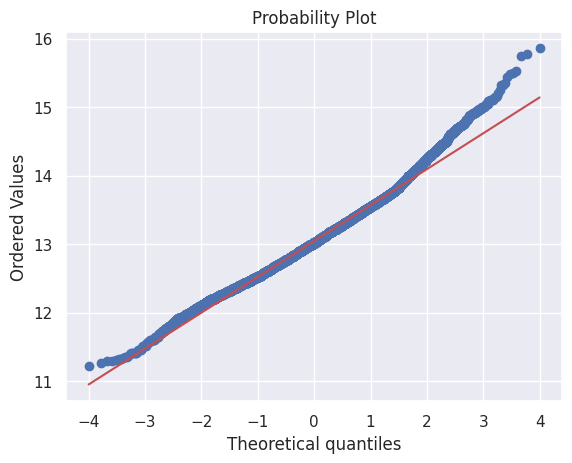

In [ ]:
# Select the numeric columns to include in normalization
numeric_columns = housing_df.select_dtypes(include=[np.number]).columns
exclude_columns = ['zipcode', 'lat', 'long']

# Apply log1p() function to the selected numeric columns
df_normalized = housing_df.copy()
df_normalized['price'] = df_normalized['price'].apply(np.log1p)

#Check the new distribution
sns.distplot(df_normalized['price']  , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_normalized['price'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(df_normalized['price'] , plot=plt)
plt.show()

# Data Analysis and Visualization

In [ ]:
from sklearn.preprocessing import LabelEncoder

### Target Variable Scatterplots

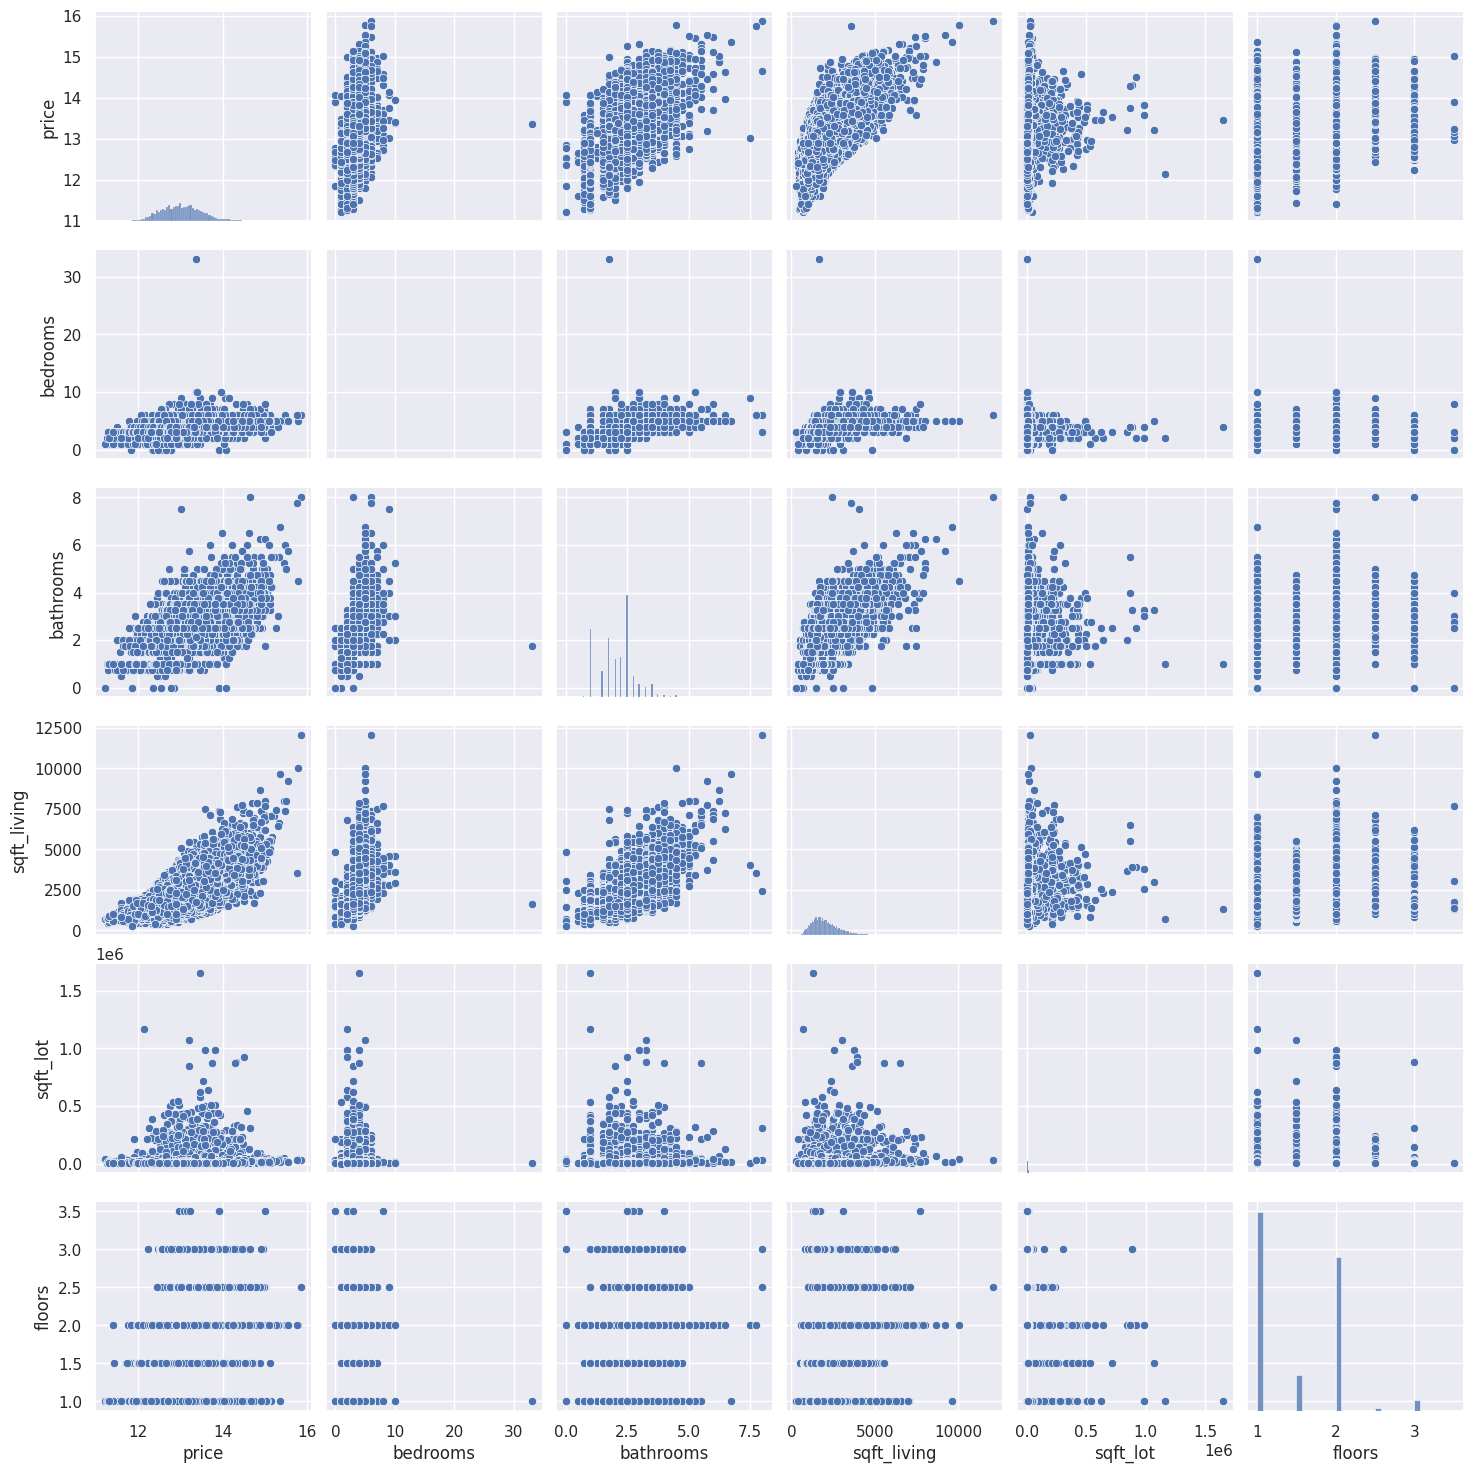

In [ ]:
sns.set()
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
sns.pairplot(df_normalized[cols], size = 2.5)
plt.show();

### Correlation Matrix

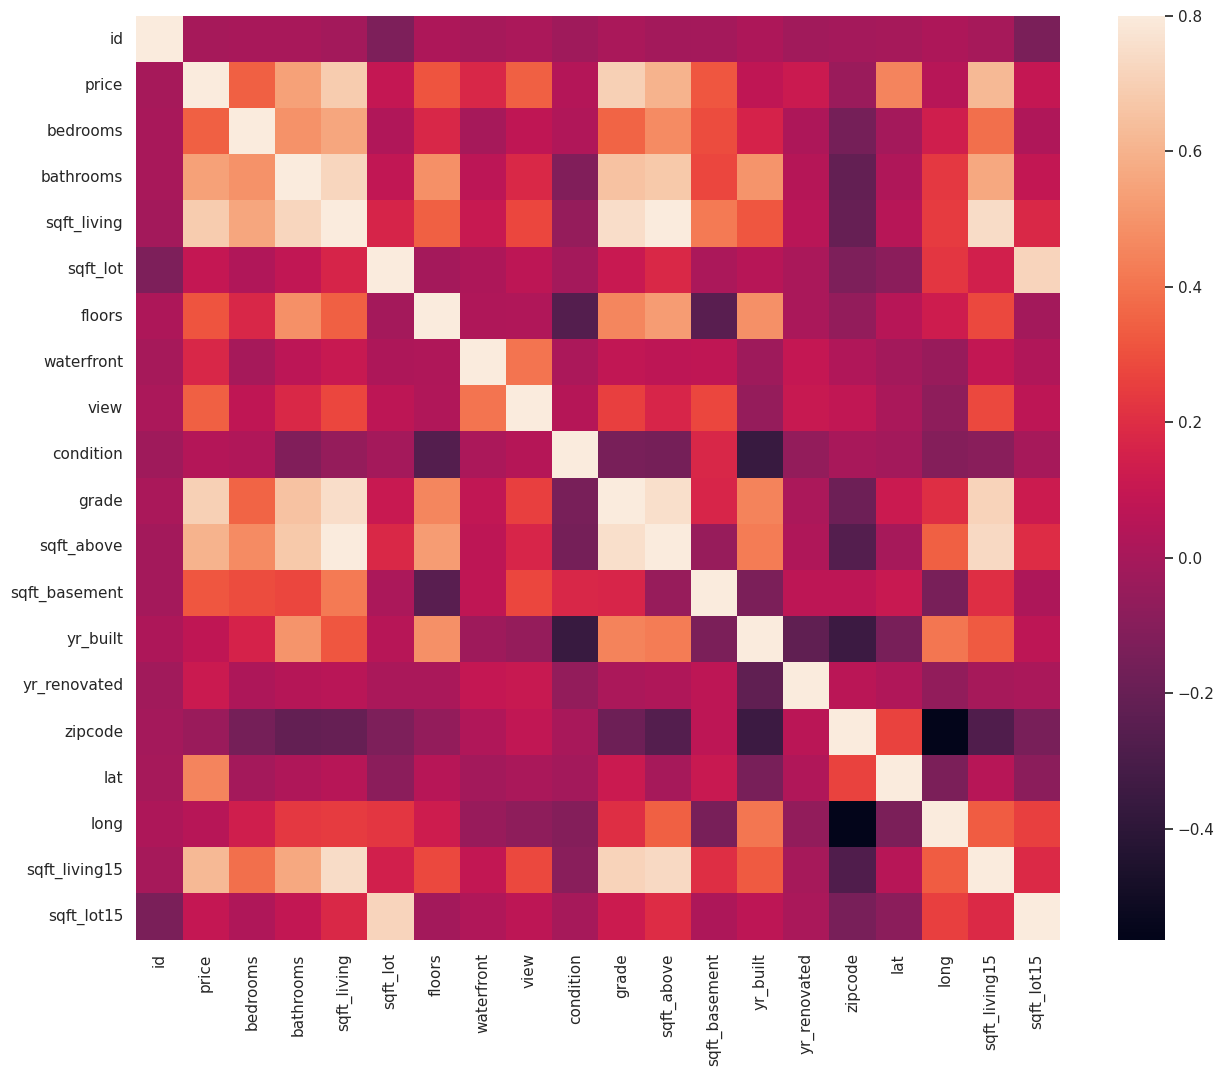

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_normalized.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
numeric_feats = df_normalized.dtypes[df_normalized.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_normalized[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
sqft_lot,13.186515
waterfront,11.384318
sqft_lot15,9.506083
yr_renovated,4.549178
view,3.395514
bedrooms,2.064490
sqft_basement,1.577856
sqft_above,1.446564
sqft_living,1.422119
sqft_living15,1.108104


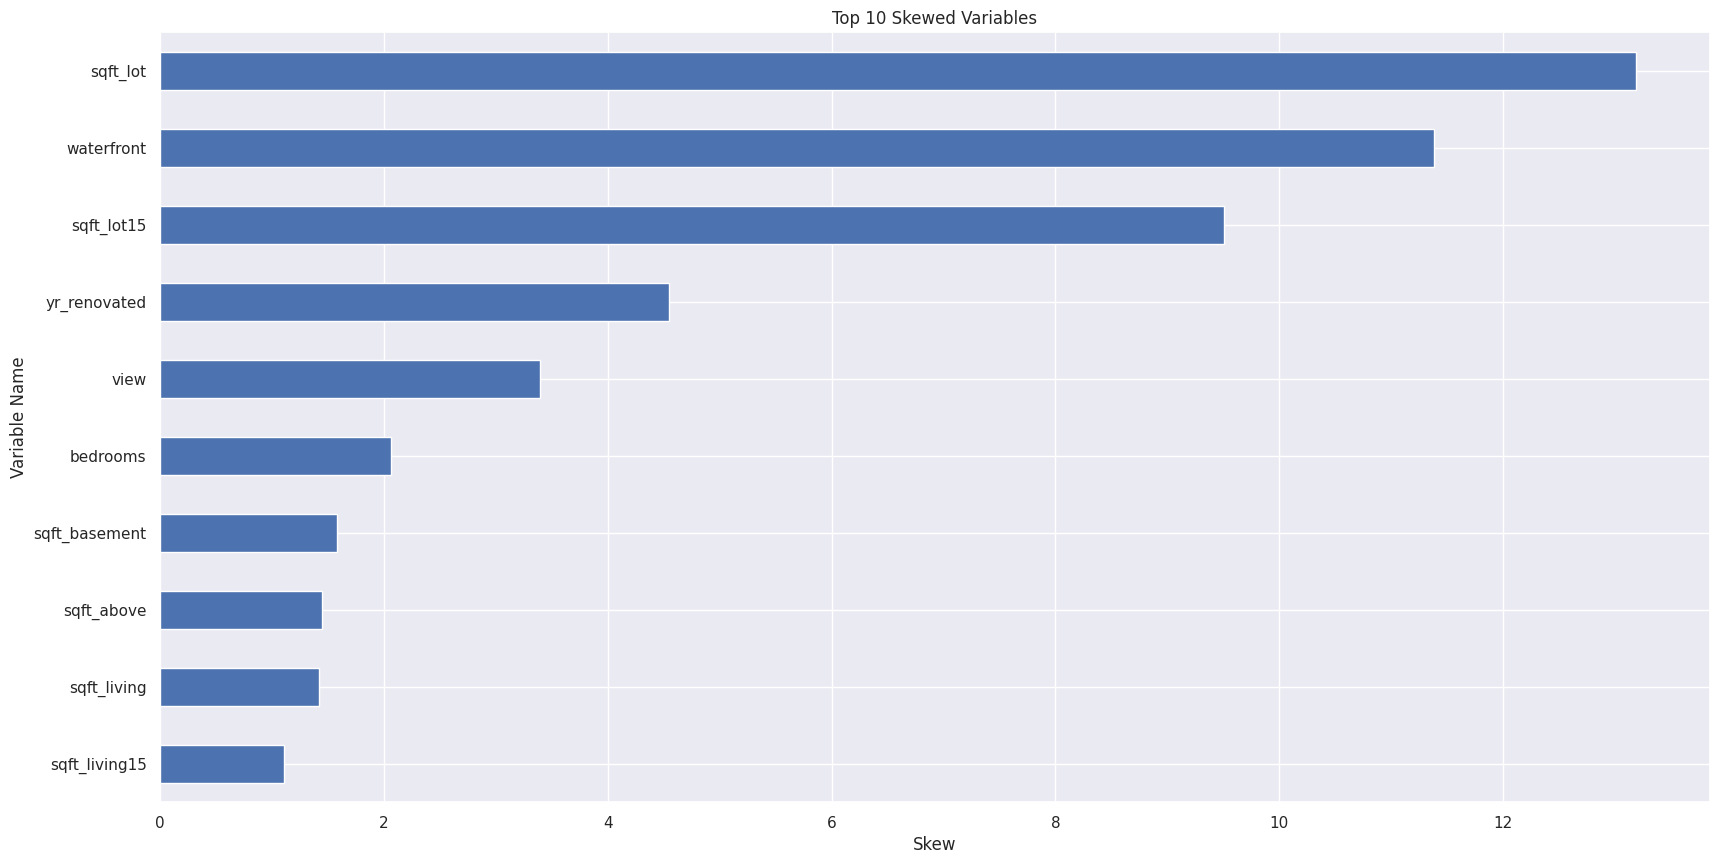

In [ ]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform (normalize)".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    housing_df[feat] = boxcox1p(housing_df[feat], lam)



There are 20 skewed numerical features to Box Cox transform (normalize)


In [ ]:
df_normalized.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309987,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195616,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100718,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311331,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142168,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Analytics

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Split to training and testing set by 80% and 20% based on date
df_normalized['date'] = pd.to_datetime(df_normalized['date'])
df_normalized.sort_values('date', inplace=True)
split_index = int(len(df_normalized) * 0.8)

train_df = df_normalized[df_normalized.columns.difference(['id', 'date', 'price'])]
# Split the DataFrame into train and test based on the calculated index
x_train = train_df[:split_index]
y_train = df_normalized['price'][:split_index]
x_test = train_df[split_index:]
y_test = df_normalized['price'][split_index:]

In [ ]:
x_train.shape

(17290, 18)

In [ ]:
y_train.shape

(17290,)

In [ ]:
x_test.shape

(4323, 18)

In [ ]:
y_test.shape

(4323,)

In [ ]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [ ]:
dt = DecisionTreeRegressor(max_depth = 10)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [ ]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

### Training on different models

#### Linear Regression with Intercept

In [1]:
lr_w_int.fit(x_train, y_train)
lr_y_pred = lr_w_int.predict(x_test)

# Calculate RMSE
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)

# Calculate standard deviation
lr_std = np.std(y_test - lr_y_pred)

# Print the RMSE and std
print(f"Linear Regression with Intercept has achieved RMSE:{lr_rmse} and STD: {lr_std}")

NameError: ignored

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": lr_y_pred})
y_compare_lr.head()

#### Linear Regression without Intercept

In [ ]:

lr_no_int.fit(x_train, y_train)
lr_no_int_y_pred = lr_no_int.predict(x_test)

# Calculate RMSE
lr_no_mse = mean_squared_error(y_test, lr_no_int_y_pred)
lr_no_rmse = np.sqrt(lr_no_mse)

# Calculate standard deviation
lr_no_std = np.std(y_test - lr_no_int_y_pred)

# Print the RMSE and std
print(f"Linear Regression without Intercept has achieved RMSE:{lr_no_rmse} and STD: {lr_no_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": lr_no_int_y_pred})
y_compare_lr.head()

#### Nearest Neighbor

In [ ]:
neigh.fit(x_train, y_train)
neigh_y_pred = neigh.predict(x_test)

# Calculate RMSE
neigh_mse = mean_squared_error(y_test, neigh_y_pred)
neigh_rmse = np.sqrt(neigh_mse)

# Calculate standard deviation
neigh_std = np.std(y_test - neigh_y_pred)

# Print the RMSE and std
print(f"Nearest Neighbor has achieved RMSE:{neigh_rmse} and STD: {neigh_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": neigh_y_pred})
y_compare_lr.head()

#### Decision Tree

In [ ]:
dt.fit(x_train, y_train)
dt_y_pred = dt.predict(x_test)

# Calculate RMSE
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

# Calculate standard deviation
dt_std = np.std(y_test - dt_y_pred)

# Print the RMSE and std
print(f"Decision Tree has achieved RMSE:{dt_rmse} and STD: {dt_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": dt_y_pred})
y_compare_lr.head()

#### Random Forest

In [ ]:
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)

# Calculate RMSE
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

# Calculate standard deviation
rf_std = np.std(y_test - rf_y_pred)

# Print the RMSE and std
print(f"Random Forest has achieved RMSE:{rf_rmse} and STD: {rf_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": rf_y_pred})
y_compare_lr.head()

#### Xgboost Score

In [ ]:
model_xgb.fit(x_train, y_train)
xgb_y_pred = model_xgb.predict(x_test)

# Calculate RMSE
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

# Calculate standard deviation
xgb_std = np.std(y_test - xgb_y_pred)

# Print the RMSE and std
print(f"Xgboost Score has achieved RMSE:{xgb_rmse} and STD: {xgb_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": xgb_y_pred})
y_compare_lr.head()

#### LGBM Score


In [ ]:
model_lgb.fit(x_train, y_train)
lgb_y_pred = model_lgb.predict(x_test)

# Calculate RMSE
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

# Calculate standard deviation
lgb_std = np.std(y_test - lgb_y_pred)

# Print the RMSE and std
print(f"LGBM Score has achieved RMSE:{lgb_rmse} and STD: {lgb_std}")

In [ ]:
y_compare_lr = pd.DataFrame({"Actual": y_test, "Predicted": lgb_y_pred})
y_compare_lr.head()

## Visualize the Result

In [ ]:
#plot RMSE and STD for each Algorithm
data = {'Linear (Intercept)':[lr_rmse, lr_std], 'Linear (No Intercept)':[lr_no_rmse, lr_no_std], 'XGBoost':[xgb_rmse, xgb_std], 'Random Forest': [rf_rmse,rf_std]
        , 'LightGBM': [lgb_rmse, lgb_std], 'Decision Tree': [dt_rmse,dt_std],'Nearest Neighbor': [neigh_rmse,neigh_std]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm','RMSE','STD']

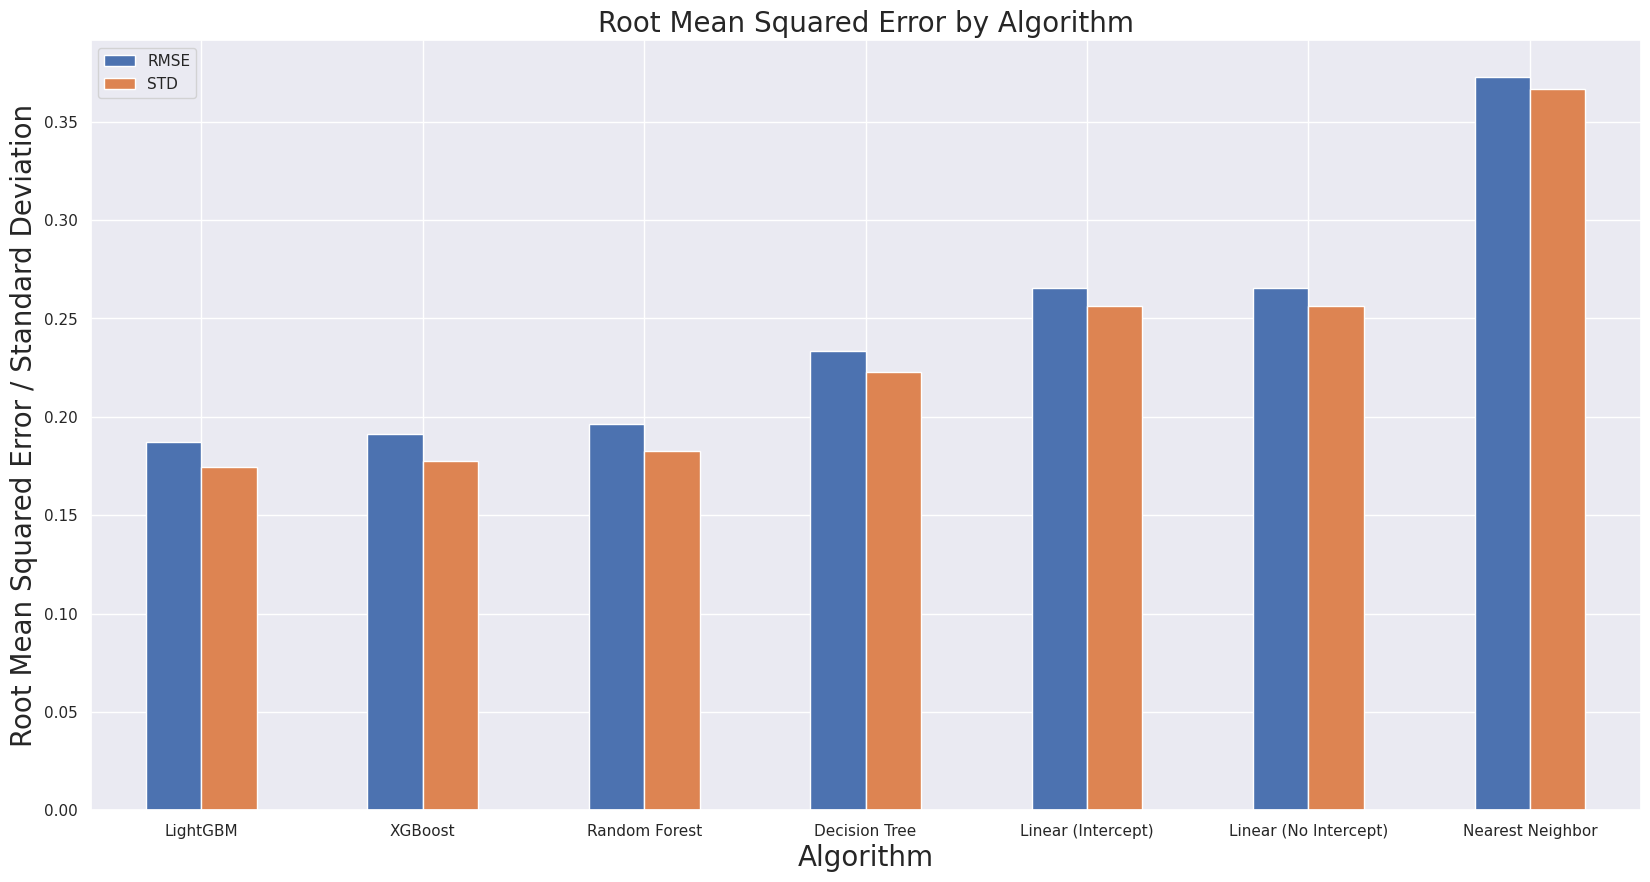

In [ ]:
# creating the bar plot
data_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error by Algorithm",fontsize=20)
plt.show()

### Variable Importance Plot

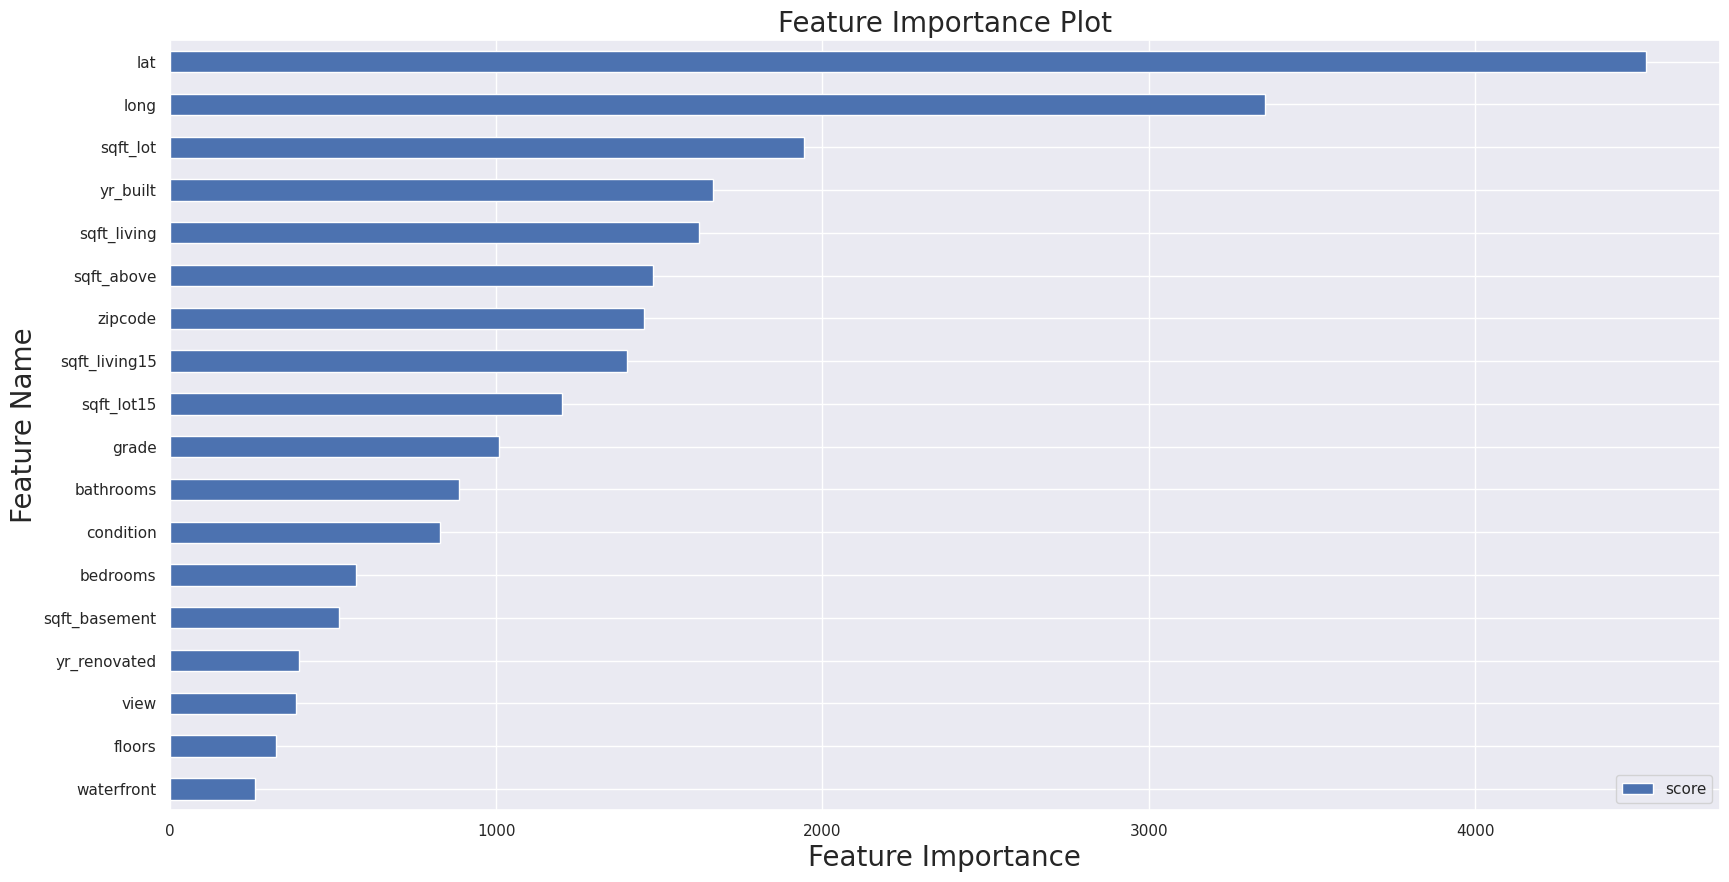

In [ ]:
# model = model_xgb.fit(train_df, .price) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model_xgb.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:20].plot(kind='barh', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Feature Importance Plot",fontsize=20)
plt.show()

In [ ]:
from prettytable import PrettyTable

sorted_feature_important = sorted(feature_important.items(), key=lambda x: x[1], reverse=True)
# Create a table to display feature importance
table = PrettyTable(["Feature", "Importance"])
for feature, importance in sorted_feature_important:
    table.add_row([feature, importance])

# Print the table
print(table)

+---------------+------------+
|    Feature    | Importance |
+---------------+------------+
|      lat      |   4524.0   |
|      long     |   3355.0   |
|    sqft_lot   |   1943.0   |
|    yr_built   |   1666.0   |
|  sqft_living  |   1621.0   |
|   sqft_above  |   1480.0   |
|    zipcode    |   1454.0   |
| sqft_living15 |   1402.0   |
|   sqft_lot15  |   1203.0   |
|     grade     |   1010.0   |
|   bathrooms   |   885.0    |
|   condition   |   828.0    |
|    bedrooms   |   571.0    |
| sqft_basement |   519.0    |
|  yr_renovated |   396.0    |
|      view     |   386.0    |
|     floors    |   324.0    |
|   waterfront  |   260.0    |
+---------------+------------+
